In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

# PyTorch Basics

En PyTorch la unidad basica con la que se trabaja son los tensores. Como se recordara un tensor es una representación más abstracta de los objetos matemáticos que usamos constantemente (i.e. escalares, vectors, matrices). Acontinuación vamos a definir algunos tensores simples.

In [4]:
# dtype: float (float32), float16, float64 (double) ...
a = torch.tensor(3,dtype=torch.float)
b = torch.tensor([2,3],dtype=torch.float)
C = torch.tensor([[4,5],[6,7]]).float()
print(a)
print(b)
print(C)

tensor(3.)
tensor([2., 3.])
tensor([[4., 5.],
        [6., 7.]])


Ahora veamos como realizar algunas operacione entre tensores en PyTorch

In [5]:
print(a * b)
print(a * C)
print(C @ b) # Matrix multiplication, in general sum_k A_ij....k B_kpq....r
# print(torch.dot(C,b))
print(C * C) # Element wise multiplication
print(C @ C) # Matrix multiplication

tensor([6., 9.])
tensor([[12., 15.],
        [18., 21.]])
tensor([23., 33.])
tensor([[16., 25.],
        [36., 49.]])
tensor([[46., 55.],
        [66., 79.]])


El corazón de PyTorch es el de poder realizar auto diferenciación (Autograd o Autodiff). Veamos una operación simple y como calcular la derivadas parciales con respecto a cada variable

In [9]:
a = torch.tensor(2,dtype=torch.float,requires_grad=True)
b = torch.tensor(3).float().requires_grad_(True)
c = torch.tensor(4).float().requires_grad_(True)
d = a + b * c
# dd/da = 1 -> 1
# dd/db = c -> 4
# dd/dc = b -> 3
d.backward()
print(a.grad,b.grad,c.grad)

tensor(1.) tensor(4.) tensor(3.)


Veamos ahora un ejemplo un poco mas complicado para poder apreciar el alcance y todo lo que se puede lograr con el Autograd.

In [10]:
A = torch.tensor([[1,2],[3,4]]).float().requires_grad_(True)
det_A = torch.det(A)
det_A.backward()
print(A.grad)

tensor([[ 4., -3.],
        [-2.,  1.]])


$\frac{\partial \vert A \vert}{\partial A} = [\frac{\partial \vert A \vert}{\partial A_{ij}}]$
$\frac{\partial \vert A \vert}{\partial A} = [\frac{\partial \vert A \vert}{\partial A_{ij}}] = (A^{-1})^T \vert A \vert$

In [ ]:
inv_A = torch.linalg.inv(A)
# Calculemos la derivada del determinante de un matriz con respecto 
# a los elementos de la matriz original
print(inv_A.T * det_A)

tensor([[ 4., -3.],
        [-2.,  1.]], grad_fn=<MulBackward0>)


# Simple Linear Regression

Veamos un caso simple en como aplicar los que hemos aprendido de PyTorch a un problema comun: regresion lineal. Primero creemos algunos datos randoms.

In [2]:
N = 100
x_data = torch.linspace(0,5,N).float()
y_data = 2 * x_data + 5 + 2*torch.randn(N)

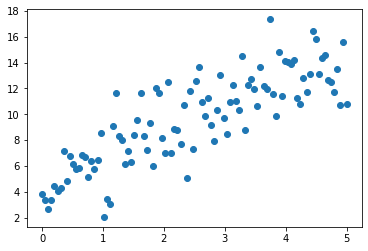

In [3]:
plt.scatter(x_data,y_data)

Problema: Queremos encontrar la recta que mejor se ajuste a los datos que generamos.

Sabemos que nuestra recta tiene 2 parametros: w (pendiente) y b (intercepto). Asi que el problema se centra en encontrar los ***parametros*** optimos que ajustan al ***modelo*** a los datos que tenemos. Para medir que "tan bien" se ajusta nuestro modelo a nuestros datos, vamos a necesitar de algun tipo de medida. A esta medida se le conoce como ***función de perdida*** (Loss Function). La función de pérdida más común en regresión es la de "mean square error loss", la cual se define acontinuacion. 

$\mathcal{L}(ypred,y) = \frac{1}{n}\sum_{i=0}^n \vert ypred_i - y_i \vert ^ 2$

Como se puede ver en esta ecuación, cuanto más se parezca $ypred$ al valor de $y$, la función de perdida se vuelve más pequeña. Entonces el problema se reduce a un problema de minimización. 

Utilizemos el método del gradient descent para poder encontrar los parámetros de la recta que se adecua mejor a nuestros datos. 

In [5]:
# Definimos los parametros de nuestro modelo
w = torch.tensor(1).float().requires_grad_(True)
b = torch.tensor(1).float().requires_grad_(True)

# Learning rate
lr = 0.1

for epoch in range(100):
  # Hacemos una prediccion con los valores de los parametros actuales
  y_pred = w * x_data + b
  # Calculamos la perdida (loss function)
  loss = torch.mean((y_pred - y_data)**2)
  # Realizamos el backpropagation para la calcular la gradiente 
  # del loss function con respecto a cada variable
  loss.backward()
  if (epoch+1) % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Actualizamos los parametros siguiendo la direccion
  # contraria del gradiente
  w.data = w.data - lr * w.grad
  b.data = b.data - lr * b.grad
  # Importante
  w.grad.zero_()
  b.grad.zero_()
print(w,b)

epoch: 9, loss: 6.211849212646484
epoch: 19, loss: 4.333920478820801
epoch: 29, loss: 4.059543609619141
epoch: 39, loss: 3.964139699935913
epoch: 49, loss: 3.927567481994629
epoch: 59, loss: 3.913459539413452
epoch: 69, loss: 3.908015251159668
epoch: 79, loss: 3.9059150218963623
epoch: 89, loss: 3.9051036834716797
epoch: 99, loss: 3.9047906398773193
tensor(1.9935, requires_grad=True) tensor(4.6654, requires_grad=True)


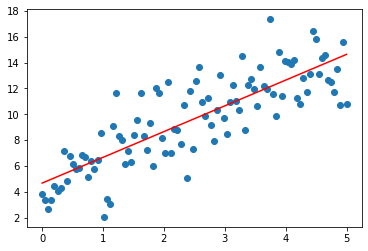

In [11]:
plt.scatter(x_data,y_data)
plt.plot(x_data, (w* x_data + b).detach().numpy(),c="r")

Realicemos lo mismo pero utilizando algunas de las herramientas que nos da PyTorch

In [13]:
x = torch.rand(2,3,4)

In [16]:
x

tensor([[[0.5360, 0.7338, 0.7024, 0.4366],
         [0.8269, 0.1053, 0.1919, 0.7612],
         [0.3430, 0.5332, 0.4725, 0.2416]],

        [[0.8623, 0.3688, 0.7954, 0.6579],
         [0.4734, 0.3587, 0.9357, 0.3282],
         [0.5276, 0.5764, 0.9884, 0.2925]]])

In [21]:
# Definimos los parametros: w y b
# linear_model = nn.Linear(1,1,bias=False) -> no hay b | output = x W 
linear_model = nn.Linear(1,1) # -> hay b | output x W  + b
# Veamos los parámetros de nuestro modelo
for param in linear_model.parameters():
  print(param)

# Definimos nuestra funcion de perdida (criterion)
crit = nn.MSELoss()

# Definimos nuestro optimizador
# en otras palabras, la forma en la que actualizaremos nuestros parámetros
# w.data = w.data - lr * w.grad
# b.data = b.data - lr * b.grad
optim = torch.optim.SGD(linear_model.parameters(),lr=0.1)

# Preparamos nuestros datos
x = x_data.reshape(-1,1)
y = y_data.reshape(-1,1)

for epoch in range(100):
  # Volvemos todas las gradientes zero para evitar acumulación de gradientes
  optim.zero_grad()
  # Hacemos una predicción con los valores actuales de los parámetros
  y_pred = linear_model(x)
  # Calculamos la perdida
  loss = crit(y_pred, y)
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Realizamos el backpropagation
  loss.backward()
  # Actualizamos los parametros
  optim.step()

print([param for param in linear_model.parameters()])

Parameter containing:
tensor([[0.5995]], requires_grad=True)
Parameter containing:
tensor([0.6936], requires_grad=True)
epoch: 0, loss: 63.683074951171875
epoch: 10, loss: 6.2790656089782715
epoch: 20, loss: 4.3393449783325195
epoch: 30, loss: 4.061159133911133
epoch: 40, loss: 3.9647529125213623
epoch: 50, loss: 3.9278037548065186
epoch: 60, loss: 3.91355037689209
epoch: 70, loss: 3.908050537109375
epoch: 80, loss: 3.905928373336792
epoch: 90, loss: 3.905109167098999
[Parameter containing:
tensor([[1.9939]], requires_grad=True), Parameter containing:
tensor([4.6639], requires_grad=True)]


# Multi Layer Perceptron

Ahora veamos un modelo un poco más complicado que un simple modelo lineal. Un MultiLayer Perceptron básicamente consiste en un sequencia de multiplicaciones matriciales

In [22]:
mnist_train_ds = torchvision.datasets.MNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
mnist_test_ds = torchvision.datasets.MNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Veamos la forma de la data en MNIST

In [28]:
class Test:
  def __init__(self):
    self.elem = 0
  def __iter__(self):
    self.elem = 0
    print("__iter__ ha sido llamado")
    return self
  def __next__(self):
    print("__next__ ha sido llamado")
    tmp = self.elem 
    self.elem += 2
    if tmp > 20:
      raise StopIteration
    return tmp

In [29]:
t = Test()

In [ ]:
iter(t)

In [30]:
for elem in t:
  print(elem)

__iter__ ha sido llamado
__next__ ha sido llamado
0
__next__ ha sido llamado
2
__next__ ha sido llamado
4
__next__ ha sido llamado
6
__next__ ha sido llamado
8
__next__ ha sido llamado
10
__next__ ha sido llamado
12
__next__ ha sido llamado
14
__next__ ha sido llamado
16
__next__ ha sido llamado
18
__next__ ha sido llamado
20
__next__ ha sido llamado


In [31]:
print("Total cantidad de datos en MNIST: ",len(mnist_train_ds))
x, y = next(iter(mnist_train_ds))
print(y)
print(x.shape)

Total cantidad de datos en MNIST:  60000
5
torch.Size([1, 28, 28])


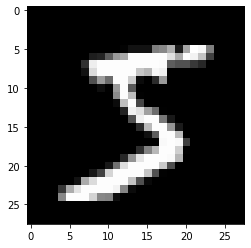

In [32]:
plt.imshow(x.reshape(28,28).numpy(),cmap="gray")

Cuando entrenamos redes neuronales, es prácticamente imposible utilizar todos los datos ya que no tenemos suficiente memoria (RAM memory). Por lo que se acostumbra entrenar utilizando "lotes" o "batches" más pequeños, lo cual tambien trae beneficios en la precision alcanzada por la red.

In [33]:
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_ds,batch_size=128)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_ds,batch_size=128)

In [34]:
for x, y in mnist_train_loader:
  print(x.shape, y.shape)
  break

torch.Size([128, 1, 28, 28]) torch.Size([128])


Otro de los beneficios que nos provee PyTorch es el de poder usar el poder computacional de las tarjetas gráficas (GPU).

In [35]:
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [36]:
dev

device(type='cuda', index=0)

In [37]:
x = torch.rand(3,3)
print(x)

tensor([[0.6539, 0.4400, 0.1923],
        [0.9203, 0.7579, 0.2969],
        [0.4804, 0.0712, 0.1035]])


In [38]:
# y = torch.rand(3,3,device=dev)
# y = torch.rand(3,3).to(dev)
y = torch.rand(3,3)
y = y.to(dev)
print(y)

tensor([[0.0216, 0.3352, 0.2196],
        [0.9061, 0.9463, 0.9025],
        [0.3052, 0.9272, 0.7449]], device='cuda:0')


In [41]:
# x.to(dev) + y
x + y.cpu()

tensor([[0.6755, 0.7752, 0.4119],
        [1.8264, 1.7042, 1.1994],
        [0.7856, 0.9985, 0.8484]])

Ahora definamos nuestro modelo.

In [42]:
x = torch.rand(128,1,28,28)

In [44]:
nn.Flatten()(x).shape

torch.Size([128, 784])

In [46]:
x.reshape(-1,28*28).shape

torch.Size([128, 784])

In [47]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

In [50]:
x = torch.rand(1,1,28,28)

In [52]:
model(x.to(dev))

tensor([[-0.0943,  0.1663,  0.0834, -0.1173,  0.0207, -0.0511,  0.0652, -0.0809,
         -0.1208, -0.0007]], device='cuda:0', grad_fn=<AddmmBackward0>)

Definamos nuestro loss function y el optimizador que será usado en el entrenamiento

In [48]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)

Pongamos el algoritmo de entrenamiento anteriormente usado dentro de una función.

In [49]:
def evaluate(model, loader, crit):
  model.eval()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in loader:
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100* corrects / total
  avg_loss /= len(loader)  
  return avg_loss, acc

def train_one_epoch(model, train_loader, crit, optim):
  model.train()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in train_loader:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    loss.backward()
    optim.step()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100 * corrects / total
  avg_loss /= len(train_loader)
  return avg_loss, acc

def train(model, train_loader, test_loader, crit, optim, epochs = 20):
  for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader,crit, optim)
    test_loss, test_acc = evaluate(model, test_loader, crit)
    print(f"epoch: {epoch}, train loss: {train_loss}, train acc: {train_acc}%, test loss: {test_loss}, test acc: {test_acc}%")

Entrenemos nuestro modelo!

In [53]:
EPOCHS = 10
train(model,mnist_train_loader,mnist_test_loader,crit,optim,epochs=EPOCHS)

epoch: 0, train loss: 0.3737218280487668, train acc: 90.08%, test loss: 0.2024705837351046, test acc: 94.04%
epoch: 1, train loss: 0.1666419013286196, train acc: 95.21833333333333%, test loss: 0.13648581635383772, test acc: 95.95%
epoch: 2, train loss: 0.11466027466433325, train acc: 96.68%, test loss: 0.10731746020720966, test acc: 96.75%
epoch: 3, train loss: 0.08537706928645401, train acc: 97.50666666666666%, test loss: 0.09301045959332038, test acc: 97.07%
epoch: 4, train loss: 0.06637027436223969, train acc: 98.08166666666666%, test loss: 0.08469408877412023, test acc: 97.37%
epoch: 5, train loss: 0.05273997289702487, train acc: 98.48166666666667%, test loss: 0.07978787901074495, test acc: 97.59%
epoch: 6, train loss: 0.04222784330522312, train acc: 98.85166666666667%, test loss: 0.0778196185968722, test acc: 97.68%
epoch: 7, train loss: 0.0340152476663028, train acc: 99.13833333333334%, test loss: 0.07925973626062174, test acc: 97.65%
epoch: 8, train loss: 0.02702622747630564, tr

Vizualicemos algunas de las predicciones

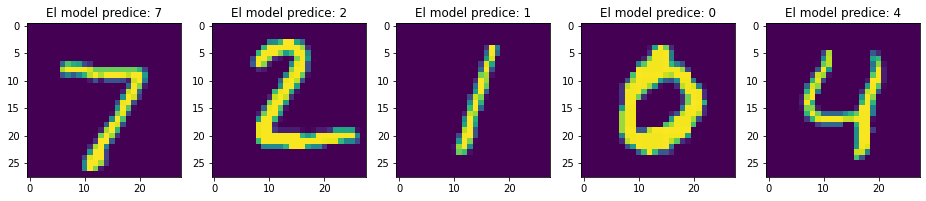

In [54]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i,(x, y) in enumerate(iter(mnist_test_ds)):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El model predice: {torch.argmax(ypred)}")

Ahora repitamos lo mismo con un dataset similar! El FashionMNIST

In [55]:
fashion_mnist_train_ds = torchvision.datasets.FashionMNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
fashion_mnist_test_ds = torchvision.datasets.FashionMNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [56]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

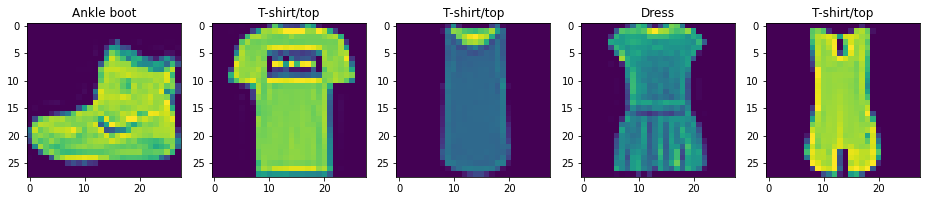

In [57]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x,y) in enumerate(fashion_mnist_train_ds):
  if i == N:
    break
  axs[i].imshow(x.reshape(28,28).numpy())
  axs[i].set_title(labels[y])

In [58]:
fashion_mnist_train_dl = torch.utils.data.DataLoader(fashion_mnist_train_ds,batch_size=128)
fashion_mnist_test_dl = torch.utils.data.DataLoader(fashion_mnist_test_ds,batch_size=128)

In [59]:
fashion_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

In [60]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.SGD(fashion_model.parameters(),lr=0.01)
train(fashion_model,fashion_mnist_train_dl,fashion_mnist_test_dl,crit,optim,epochs=10)

epoch: 0, train loss: 1.392623655196192, train acc: 63.00833333333333%, test loss: 0.9321552907364278, test acc: 68.34%
epoch: 1, train loss: 0.8068960092977674, train acc: 72.96833333333333%, test loss: 0.742462093317056, test acc: 74.13%
epoch: 2, train loss: 0.68396616579373, train acc: 77.055%, test loss: 0.6610423805592935, test acc: 77.14%
epoch: 3, train loss: 0.6192691827506653, train acc: 79.435%, test loss: 0.6119756211962881, test acc: 78.96%
epoch: 4, train loss: 0.5776517318128777, train acc: 80.82833333333333%, test loss: 0.5794844668877276, test acc: 80.07%
epoch: 5, train loss: 0.5487904889878433, train acc: 81.64333333333333%, test loss: 0.5565482185611242, test acc: 80.82%
epoch: 6, train loss: 0.5275818584824422, train acc: 82.22166666666666%, test loss: 0.5394271434862402, test acc: 81.42%
epoch: 7, train loss: 0.5112103183767689, train acc: 82.70166666666667%, test loss: 0.5260511734817601, test acc: 81.9%
epoch: 8, train loss: 0.49805016793421847, train acc: 83.10

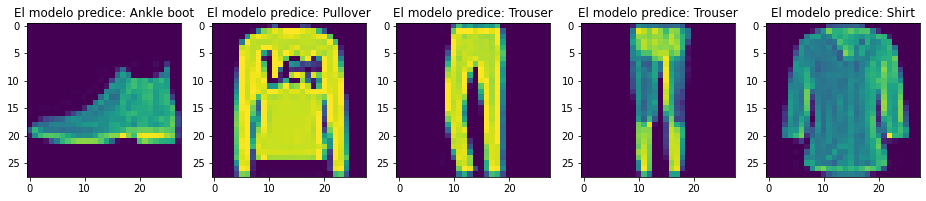

In [61]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x, y) in enumerate(fashion_mnist_test_ds):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = fashion_model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El modelo predice: {labels[torch.argmax(ypred)]}")